## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [48]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [49]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv')

In [50]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [51]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [52]:
data.isnull().any().any()

False

Пропусков нет

In [53]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [54]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [55]:
data.people_liable.unique()

array(['0 to 2', '3 or more'], dtype=object)

1. Количественные (вещественные) признаки: 
    duration (продолжительность),
    amount (сумма),
    age(возраст) - тк их значениями являются вещественные числа, не имеющие приоритета между собой.
    

2. Бинарные признаки: 
    telephone (телефон) - есть ли телефон и два ответа - нет и да (под именем работника);
    foreign_worker (иностранный работник), тк два варианта ответа на вопрос: является ли иностранным работником?;
    credit_risk (кредитный риск), тк есть два варианта - good, bad;
    
    
3. Качественные признаки: 
    
    purpose (цель кредита) - тк есть просто различные виды товаров и услуг, на которые берется кредит и их сложно ранжировать между собой;
    
    personal_status_sex (пол человека и его статус в обществе) - тк нельзя ранжировать людей по полу (ну мы же не сексисты...) и осуждать за развод...;
    
    property (имущество) - тк нельзя дать оценку и упорядочить согласно типам имущества;
    
    job (работа) - тк отдельно можно выделить только безработных, но они в одной категории с неквалифицированными и являются нерезидентами, среди резидентов есть неквалифицированные, но не безработные, + сложно оценить, кто более рентабелен - должностное лицо или квалифицированный работник, + самозанятые не всегда стоят в одной категории с менеджерами с точки зрения доходов и постоянства заработка;
    
    other_installment_plans (другие виды рассрочки) - сложно оценить, какие из видов менее приоритетны для банка;
    
    installment_rate (ставка рассрочки) - является ли она частью от дохода (согласна некоторым описаниям датасета), или же просто ежегодной ставкой процента, сложно оценить рентабелность той или иной ставки для банка, тк они могут быть одинаково выгодными и нет, а к тому же не всегда наибольшая благотворно влияет на риски кредита,тк нет однозначности и они равнозначны между собой, то признак качественный;
    
    present_residence (время проживания в текущем месте) - не ялвяется количественным признаком, тк задает промежуток, а не конкретное число лет и не является порядковым, тк нельзя выдать градацию и гарантии для банка в зависимости от времени проживания в данном месте;
    
    number_credits (число кредитов) - если было бы в текущий момент, то являлось бы порядковым признаком, но тк в данной графе нет сведений о каждом из кредитов, закрыт ли он был итд, то нельзя ранжировать, не является количественным, тк нет конкретных значений, а есть группы с промежутками;
    
    people_liable (количество людей, ответсвенных за исполнение) - нельзя ранжировать, тк нет данных, за что ответсвенны...;
    
    
4. Порядковые признаки: 

    savings (сбережения) - тк данные диапазоны можно упорядочить по значимости банку и они играют важную роль в кредитной истории человека;
    
    status (статус счёта) - тк для банка важен статус счета и можно упорядочить по кол-ву денег;
    
    credit_history (кредитная история) - тк для банка важна кредитная история человека и ее можно ранжировать от самой хорошей к самой худшей;
    
    employment_duration (продолжительность работы) - можно ранжировать, тк если у человека есть работа и устоявшийся заработок, то это положительно влияет на риск кредитования;
    
    housing (снятое ли жилье) - для банка выгоднее, если жилье является собсвенным и более выгодно бесплатное жилье, чем то, за которое установлена рента;
    
    other_debtors - есть ранжирование, тк банку выгоднее, если есть поручители или вторая сторона, выплачивающая кредит.

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [56]:
data.groupby('purpose').amount.mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [57]:
data[(data.age < 30) & (data.housing == 'rent')].age.count() / data[data.age < 30].age.shape[0] * 100

66.66666666666666

In [58]:
data[(data.age > 40) & (data.housing == 'rent')].age.count() / data[data.age > 40].age.shape[0] * 100

68.01470588235294

In [59]:
# если считаем, что for free - не съемное жилье

In [60]:
data[(data.age > 40) & (data.housing != 'own')].age.count() / data[data.age > 40].age.shape[0] * 100

78.30882352941177

In [61]:
data[(data.age < 30) & (data.housing != 'own')].age.count() / data[data.age < 30].age.shape[0] * 100

97.289972899729

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [62]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [63]:
data[data.foreign_worker == 'yes'].groupby('number_credits')['foreign_worker'].count()

number_credits
1      25
2-3    11
4-5     1
Name: foreign_worker, dtype: int64

### Задание 6 (1 балл)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

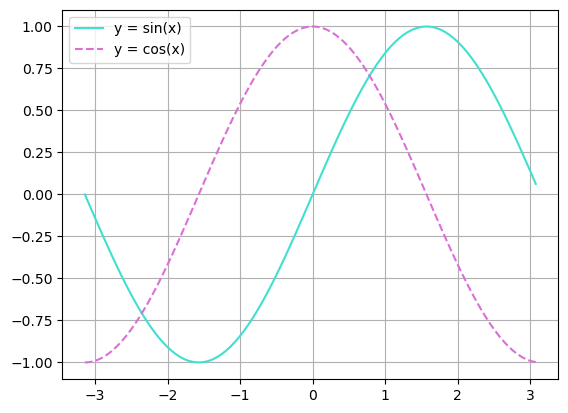

In [65]:
x = np.arange(-1 * np.pi, np.pi, 2 * np.pi / 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, color = 'turquoise')
plt.plot(x, y2, color = 'orchid', linestyle = '--')
plt.legend(['y = sin(x)','y = cos(x)'])
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

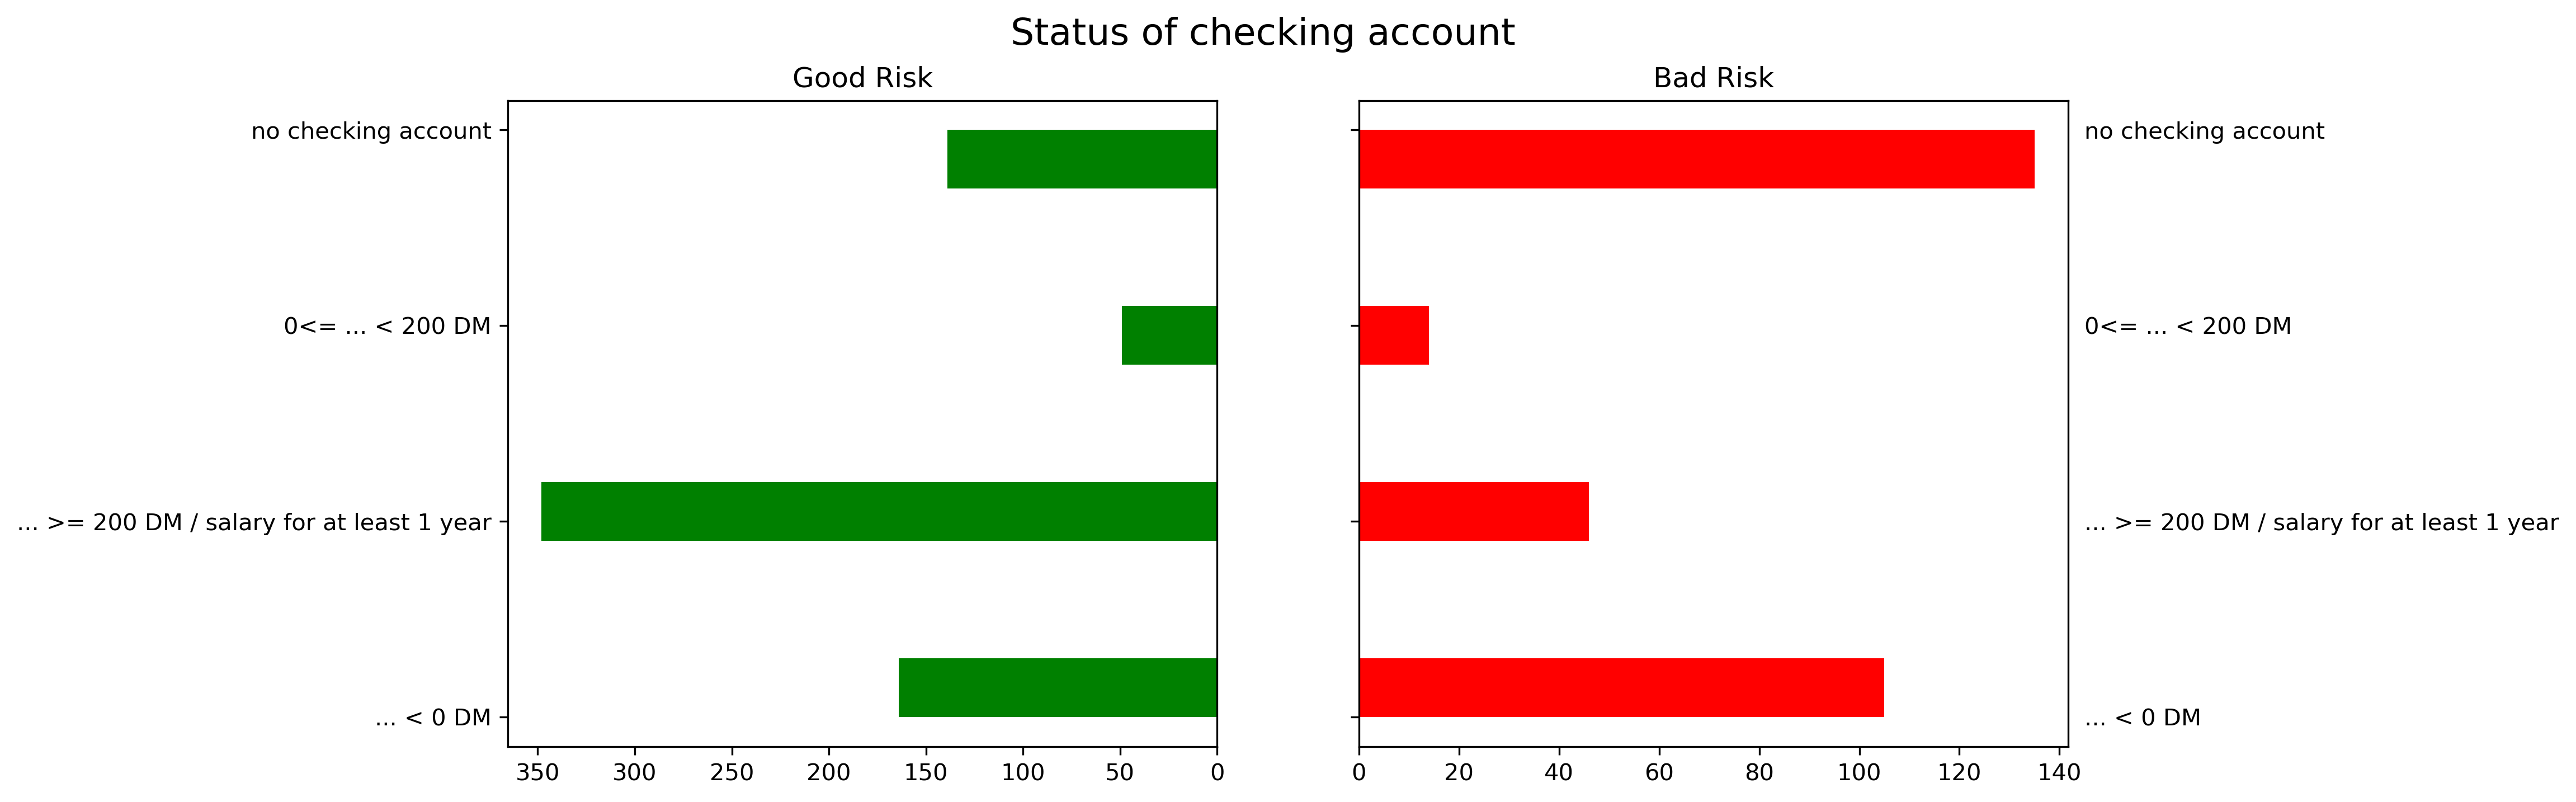

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=300)


axs[0].set_title("Good Risk")
axs[0].hist(data[data.credit_risk == 'good'].status.sort_values(), orientation='horizontal', color = 'green')
axs[0].invert_xaxis()


axs[1].set_title("Bad Risk")
axs[1].hist(data[data.credit_risk == 'bad'].status.sort_values(), orientation='horizontal', color = 'red')
axs[1].tick_params(labelright=True, labelleft=False)

fig.suptitle('Status of checking account', fontsize=16)

plt.show()

Можно заметить, что большинство отрицательных кейсов у людей без существуюшего счета в данном банке и у тех, у кого доход минимальен. А большинство положительных у людей, у которых счет используется для зарплаты или количество сбережений больше 200DM

### Задание 8  (0.5 балла)

In [67]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Text(0.5, 1.0, 'Распределение количества положительных и отрицательных кейсов в зависимости от размера сберегательного счета')

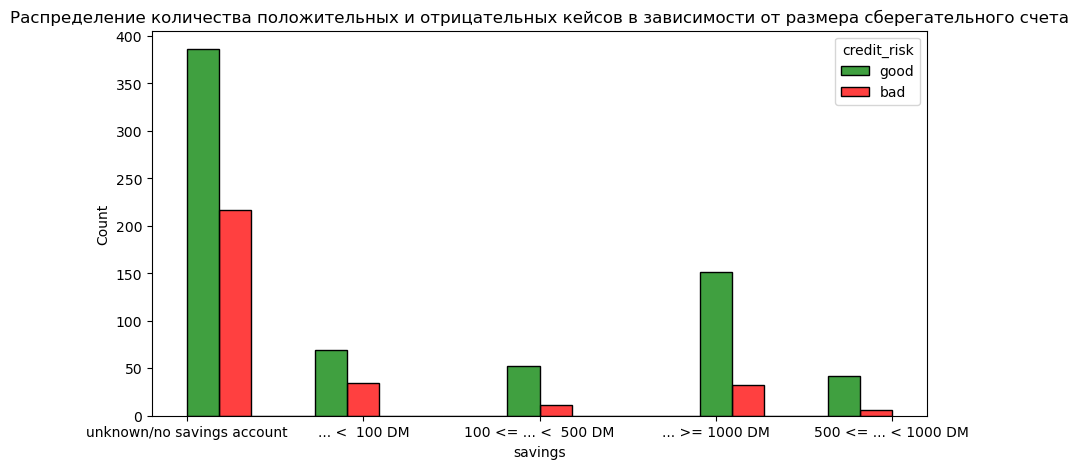

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(data, x='savings', hue='credit_risk', discrete = False, multiple="dodge", palette=['green', 'red'])

plt.title('Распределение количества положительных и отрицательных кейсов в зависимости от размера сберегательного счета')

Удивительно, что положительных кредитных историй с неизвестным кредитным аккаунтом или с его отуствием больше всего, а на втором месте - со сбережениями больше 1000DM, отрицательных также больше всего с отсутсвующим аккаунтом, а меньше со сбережениями от 500 до 1000 DM.

### Задание 9  (1 балл)

Код в seaborn писать проще, да и визуализация выглядит более красиво

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Text(0.5, 1.0, 'Распределение возрастов и положительных и отрицательных кейсов в зависимости от размера сберегательного счета')

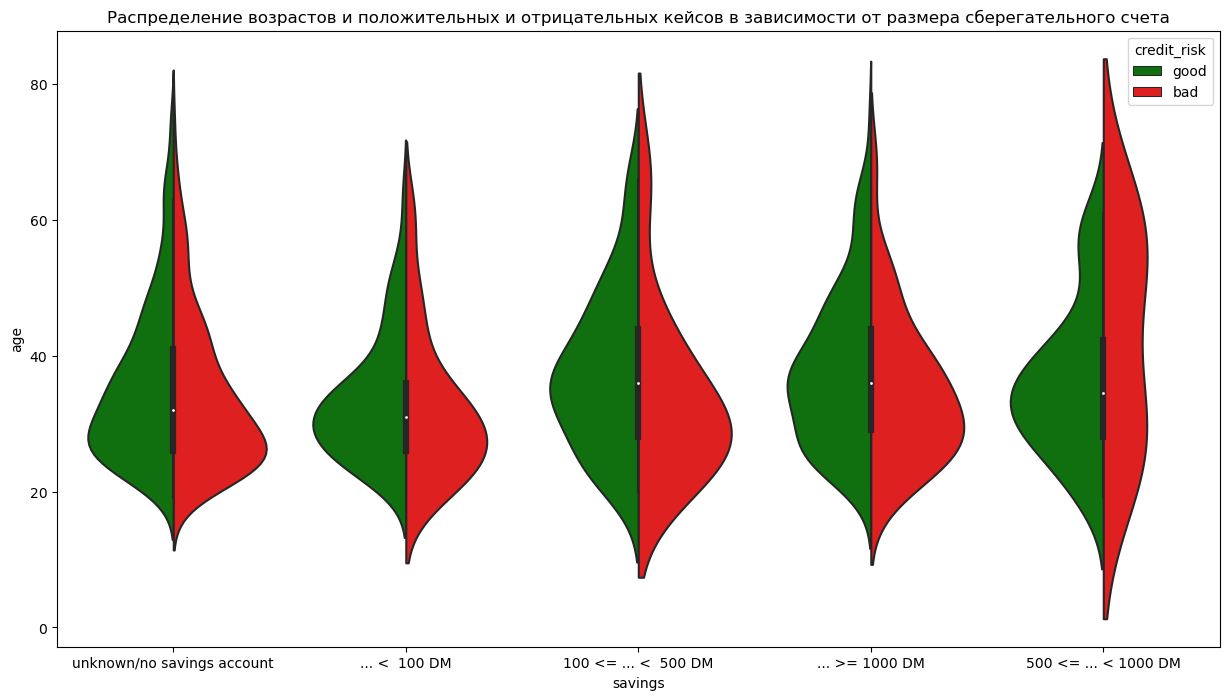

In [69]:
plt.figure(figsize=(15,8))
sns.violinplot(data=data, x="savings", y='age',  hue='credit_risk', split=True, palette=['green', 'red'])

plt.title('Распределение возрастов и положительных и отрицательных кейсов в зависимости от размера сберегательного счета')

Большинство как положительных, так и отрицательных кейсов по всем сбережениям приходятся на средний возраст, а на нормальное распределение более всего похоже при сбереджениях от 100 до 500 DM , у людей без сбережений более всего "стянута" статистика к среднему возрасту от 20 до 40.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0.5, 0.98, 'Распределение количества положительных и отрицательных кредитов в зависимости о возраста и общая статистика')

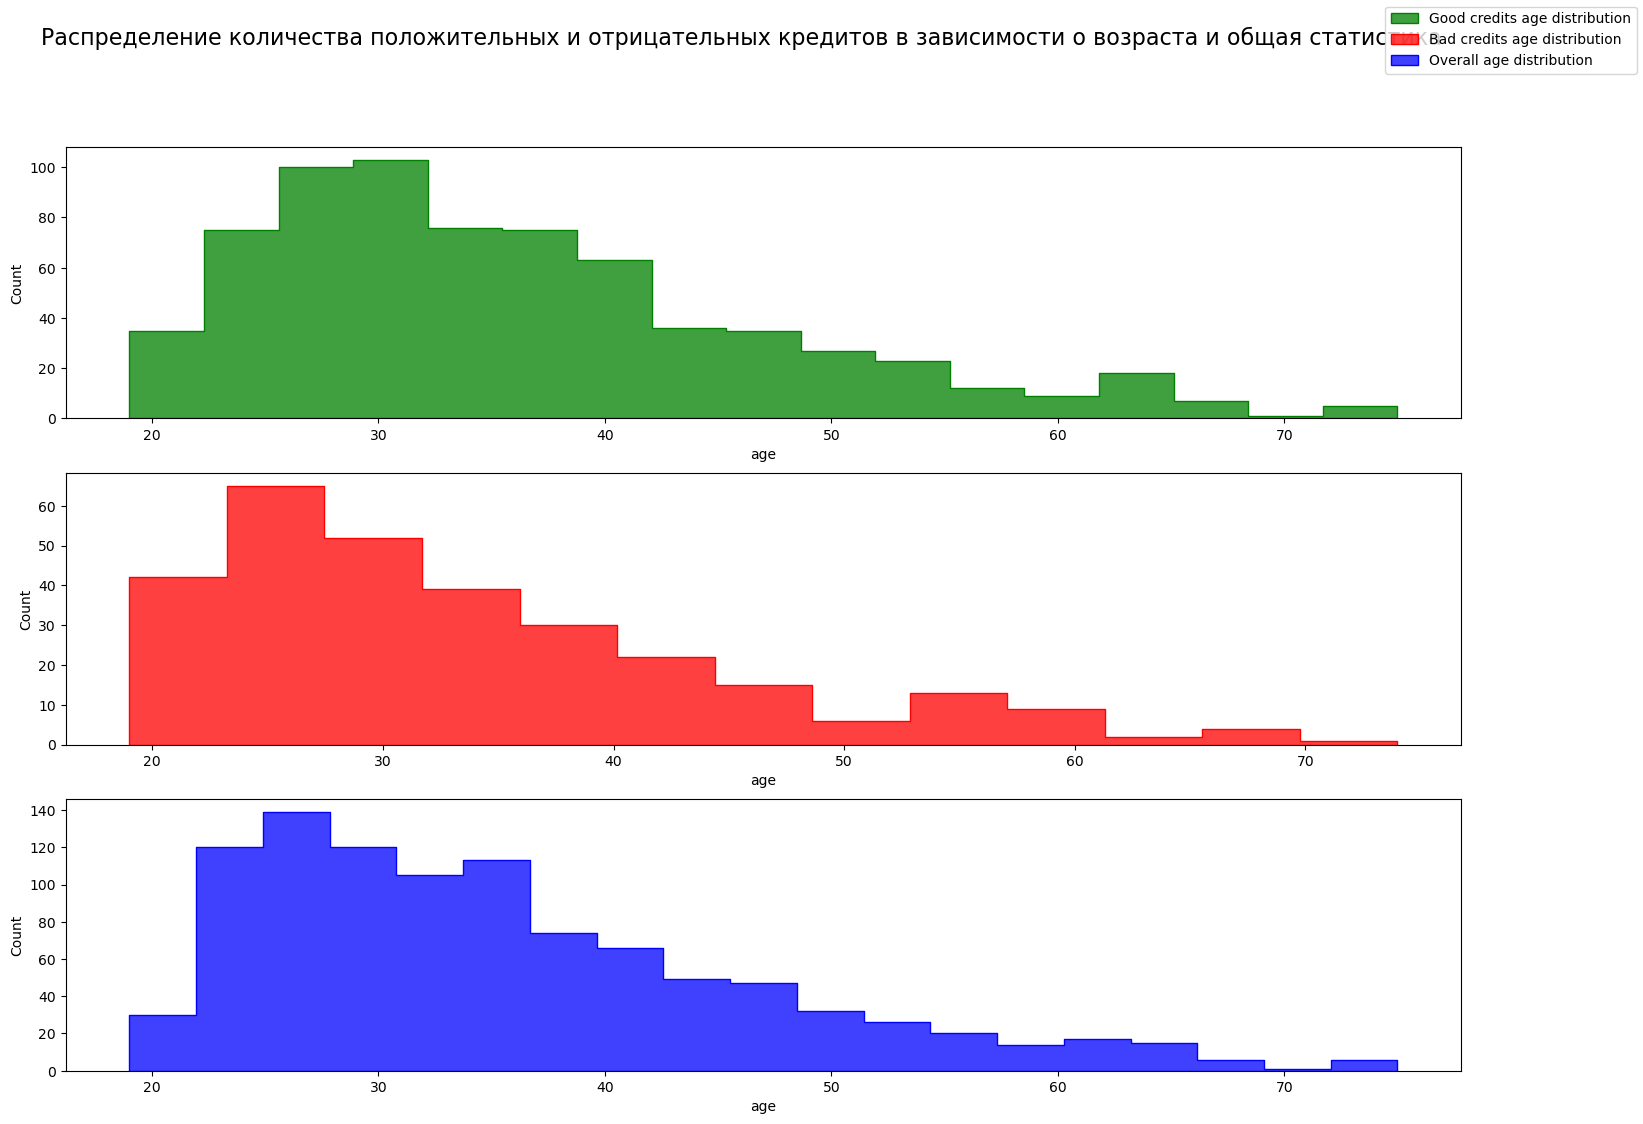

In [70]:
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.histplot(data = data[data.credit_risk == 'good'], x = 'age', color = 'green', element = 'step')

plt.subplot(3, 1, 2)
sns.histplot(data = data[data.credit_risk == 'bad'], x = 'age', color = 'red', element = 'step')

plt.subplot(3, 1, 3)
sns.histplot(data = data, x = 'age', color = 'blue', element = 'step')

fig.legend(['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])

fig.suptitle('Распределение количества положительных и отрицательных кредитов в зависимости о возраста и общая статистика', fontsize=16)


Большинство как положительных кейсов находятся в возрастном диапазоне от 25 до примерно 32, а отрицальеных - от 25 до примерно 28, в целом распределения в зависимости от возраста похожи несмотря на положительные и отрицательные кейсы.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Распределение продолжительности кредита в зависимости от суммы и количества положительных и отрицательных кейсов')

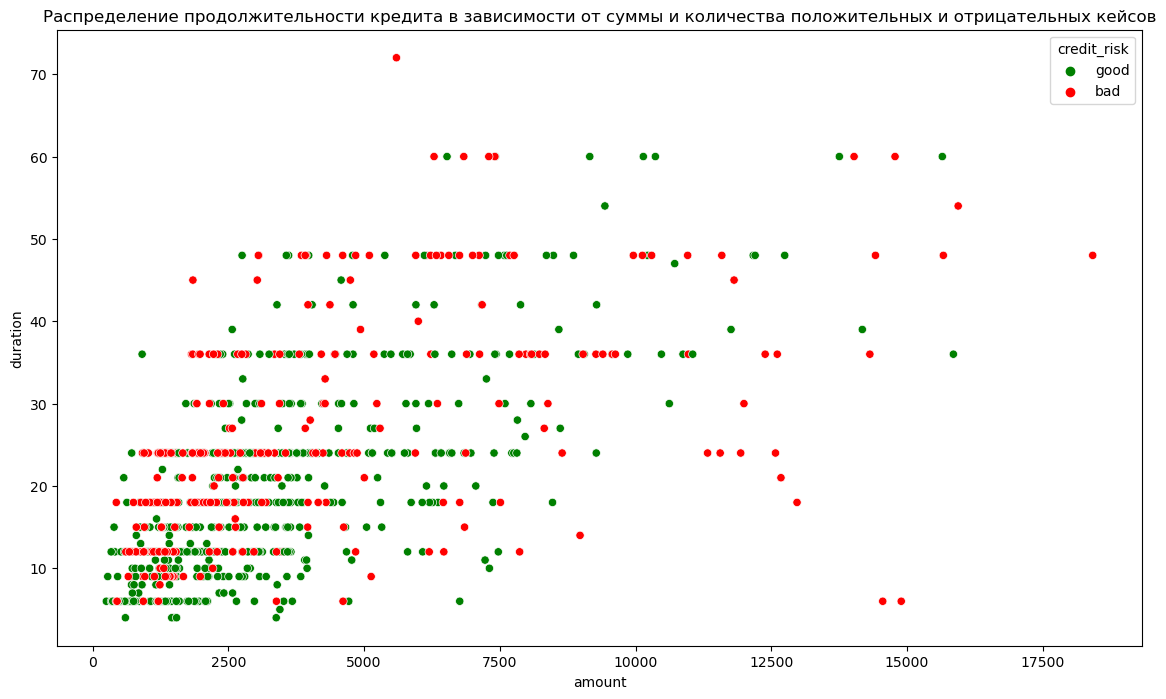

In [71]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=data, x ='amount', y ='duration', hue='credit_risk', color = 'red', palette=['green', 'red'])
plt.title('Распределение продолжительности кредита в зависимости от суммы и количества положительных и отрицательных кейсов')

Большинство успешных кейсов были при небольшой продолжительности кредита и малых суммах (до 5000), есть единичные кейсы с отрицательным влиянием и относительно небольшой суммой на отрицательный срок, также с большой суммой и не недолгий срок

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

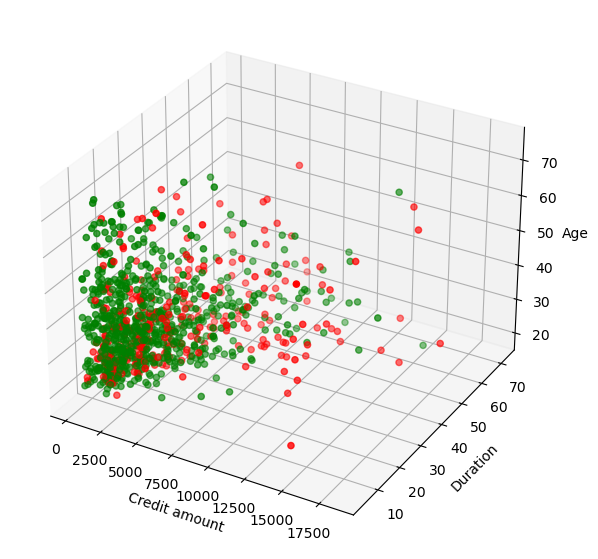

In [72]:
fig = plt.figure(figsize = (15, 7))

ax = fig.add_subplot(projection='3d')

c = data['credit_risk'].apply(lambda x: 'green' if x == 'good' else 'red')

ax.scatter(data = data, xs = 'amount', ys = 'duration', zs = 'age', color = c)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

Есть выбросы как и по возрасту (довольно старые люди с огромной суммой кредита на долгий срок) и они имеют преимущественно отрицательные ке, примущественно большая сосредоточненность положительных кейсов кредита у 

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [73]:
data.telephone.unique()

array(['no', 'yes (under customer name)'], dtype=object)

In [74]:
data.foreign_worker.unique()

array(['no', 'yes'], dtype=object)

In [75]:
data.savings.unique()

array(['unknown/no savings account', '... <  100 DM',
       '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'],
      dtype=object)

In [76]:
data.status.unique()

array(['no checking account', '... < 0 DM',
       '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
      dtype=object)

In [77]:
data.credit_history.unique()

array(['all credits at this bank paid back duly',
       'no credits taken/all credits paid back duly',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'critical account/other credits elsewhere'], dtype=object)

In [78]:
data.employment_duration.unique()

array(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed',
       '>= 7 yrs'], dtype=object)

In [79]:
data.housing.unique()

array(['for free', 'rent', 'own'], dtype=object)

In [80]:
data.other_debtors.unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [81]:
data.credit_risk = data.credit_risk.replace(['good', 'bad'],  [1, 0])

 Тк положительный кредит лучше отрицательного

In [82]:
data.telephone = data.telephone.replace(['no', 'yes (under customer name)'], [0, 1])
# лучше иметь информацию о номере телефона

In [83]:
data.foreign_worker = data.foreign_worker.replace(['no', 'yes'], [1, 0])
# безопаснее кредитовать гражданина той же страны, в которой он и работает

In [84]:
data.savings = data.savings.replace(['unknown/no savings account', '... <  100 DM',
       '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'], [0, 1, 2, 4, 3])
# чем больше сбережений и если есть информация о них, тем лучше банку

In [85]:
data.status = data.status.replace(['no checking account', '... < 0 DM',
       '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'], [0, 1, 3, 2])
# тк выгоднее иметь текущий счет в данном банке, на который перечисляется зарплата

In [86]:
data.credit_history = data.credit_history.replace(['all credits at this bank paid back duly',
       'no credits taken/all credits paid back duly',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'critical account/other credits elsewhere'], [ 4, 3 ,2 ,1 ,0])
# успешная кредитная история в данном банке лучше, чем ее отсуствие или в другом банке (могут возникнуть вопросы), 
#текущий кредитхоть и успешеый является не самым благосклонным показзателям, а проблемы в прошлом лучше, чем наличие текущего незакрытого кредита

In [87]:
data.employment_duration = data.employment_duration.replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs',
                                                             'unemployed', '>= 7 yrs'], [1, 2, 3, 0, 4])
#отсутсвие работы наименее выгодно банку, а наибольший стаж обычно говорит о стабильности

In [88]:
data.housing = data.housing.replace(['for free', 'rent', 'own'], [1, 0, 2])
# собственное жилье наиболее выгодно банку

In [89]:
data.other_debtors = data.other_debtors.replace(['none', 'guarantor', 'co-applicant'], [0, 1, 2])
#наличие второго дебетора наиболее выгодно

In [90]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,4,car (used),1049,0,1,< 20,female : non-single or male : single,0,...,car or other,21,none,1,1,skilled employee/official,0 to 2,0,1,1
1,0,9,4,others,2799,0,2,25 <= ... < 35,male : married/widowed,0,...,unknown / no property,36,none,1,2-3,skilled employee/official,3 or more,0,1,1
2,1,12,3,retraining,841,1,3,25 <= ... < 35,female : non-single or male : single,0,...,unknown / no property,23,none,1,1,unskilled - resident,0 to 2,0,1,1
3,0,12,4,others,2122,0,2,20 <= ... < 25,male : married/widowed,0,...,unknown / no property,39,none,1,2-3,unskilled - resident,3 or more,0,0,1
4,0,12,4,others,2171,0,2,< 20,male : married/widowed,0,...,car or other,38,bank,0,2-3,unskilled - resident,0 to 2,0,0,1


In [91]:
datadr = data.drop(columns=['purpose', 'installment_rate', 'personal_status_sex', 'property',
                            'other_installment_plans', 'job', 'number_credits', 'people_liable', 'present_residence'])
datadr

,status,duration,credit_history,amount,savings,employment_duration,other_debtors,age,housing,telephone,foreign_worker,credit_risk
0,0,18,4,1049,0,1,0,21,1,0,1,1
1,0,9,4,2799,0,2,0,36,1,0,1,1
2,1,12,3,841,1,3,0,23,1,0,1,1
3,0,12,4,2122,0,2,0,39,1,0,0,1
4,0,12,4,2171,0,2,0,38,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,3,1987,0,2,0,21,1,0,1,0
996,0,24,3,2303,0,4,2,45,0,0,1,0
997,3,21,4,12680,4,4,0,30,2,1,1,0
998,1,12,3,6468,4,0,0,52,0,1,1,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

Нормализуем сумму кредита и уберем возраст из признаков

In [92]:
mean = datadr.amount.mean()
std = datadr.amount.std()

In [93]:
datadr.amount = (datadr.amount - mean) / std
datadr = datadr.drop(columns = 'age')

In [94]:
def predict(Xtest: np.array) -> np.array:
    res = list()
    k = np.array([1, -2, 2, 10, 1, 1 / 6, 2 / 3, 0.006, 1, 0.5])
    for i in Xtest:
        cnt = np.sum(k * i)
        res.append(1 if cnt < 5 else 0)
    return np.array(res)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = datadr.drop('credit_risk', 1).values
y = datadr['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

/var/folders/d7/b7q9cw5d159ct6_lmr4sd5k40000gn/T/ipykernel_3087/1014767794.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = datadr.drop('credit_risk', 1).values


0.66